## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [53]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [54]:
from inauguralproject import *

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [55]:
model = ExchangeEconomyClass()

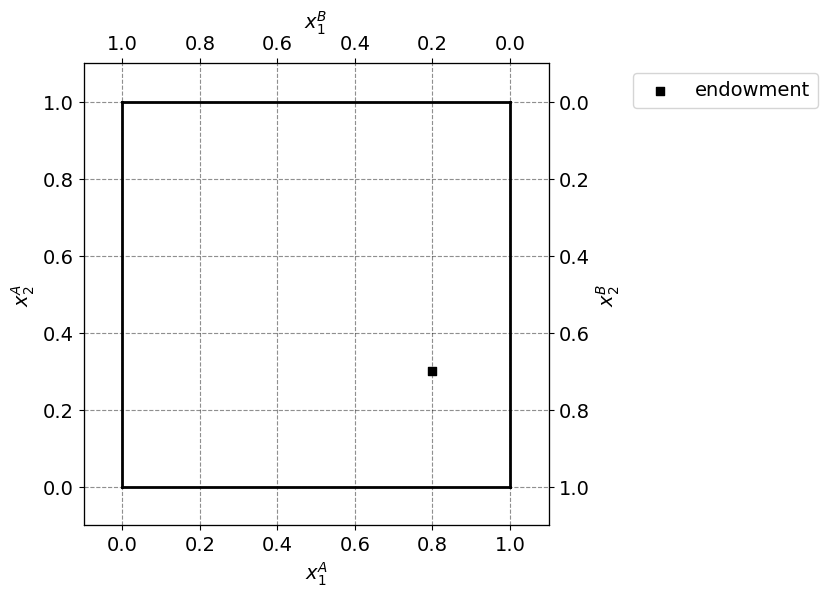

In [56]:
par = model.par

# Total endowment
w1bar = 1.0
w2bar = 1.0

# Making the graph
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

## 3. <a id='toc2_'></a>[Assignment](#toc0_)

Question 1

In [57]:
# Defining a list of possible x values: 
N = 75
x_vals = np.linspace(0, 1, N+1)

# Defining an empty list: 
pareto_efficient_allocations = []

# Finding all x values which fulfills the requirements for c (We used CHATGPT to find the pareto efficeint allocations): 
for x1A in x_vals:
    for x2A in x_vals:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A,x2A) >= model.utility_A(par.w1A, par.w2A):
            if model.utility_B(x1B, x2B) >=  model.utility_B(par.w1B, par.w2B):
                # Tranfering all pareto efficients x values to the emty list:
                pareto_efficient_allocations.append([x1A, x2A])
print("Pareto efficient allocations (first 5):")
for allocation in pareto_efficient_allocations[:5]:
    print(f"[{allocation[0]:.3f}, {allocation[1]:.3f}]")


Pareto efficient allocations (first 5):
[0.080, 0.960]
[0.093, 0.880]
[0.093, 0.893]
[0.093, 0.907]
[0.093, 0.920]


Above we find the first 5 pareto efficient allocations. We will plot all the efficient allocations (and the endowment of agent A) below with help by CHATGPT:

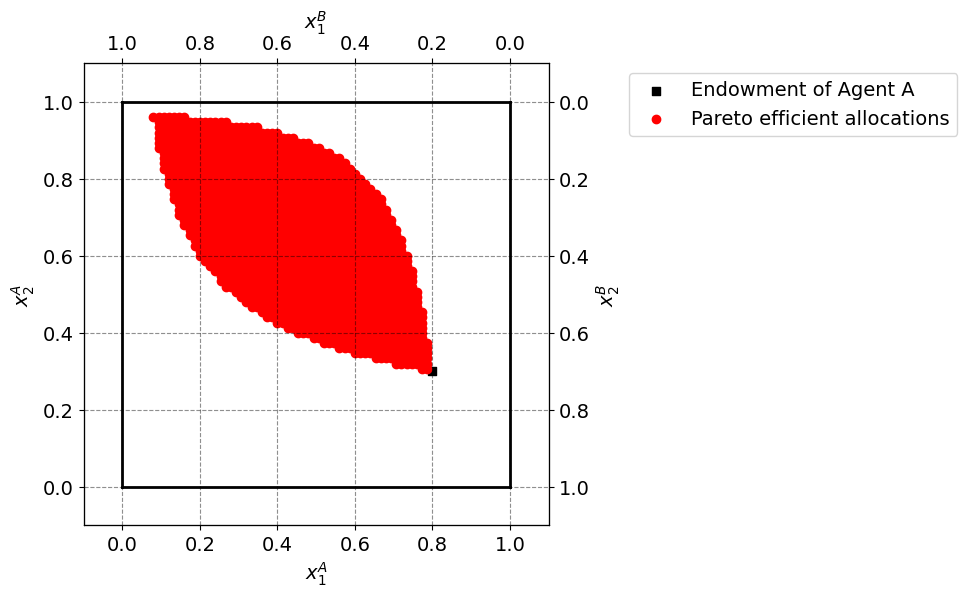

In [58]:
# Define the parameters
par = model.par
w1bar = 1.0
w2bar = 1.0

# Plotting
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Setting the labels
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the endowment of agent A:
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment of Agent A')

# Plotting pareto efficient allocations:
pareto_x1A = [allocation[0] for allocation in pareto_efficient_allocations]
pareto_x2A = [allocation[1] for allocation in pareto_efficient_allocations]
ax_A.scatter(pareto_x1A, pareto_x2A, marker='o', color='red', label='Pareto efficient allocations')

# Plotting the limits of the Edgeworth box:
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Setting the limits
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])


ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.9, 1.0))
plt.show()


Question 2

In [59]:
# Defining the intervals of P1: 
P1 = [0.5] + [0.5 + 2*i/N for i in range(1, N+1)] + [2.5]

# Creating two empty lists: 
error_1 = []
error_2 = []

# Defining the demand as "x_star"
for p1 in P1:
    x1A_star, x2A_star = model.demand_A(p1)
    x1B_star, x2B_star = model.demand_B(p1)
    
    # Defining the error in the market clearing condition s, which is defined as the demand minus the supply:
    eps1 = x1A_star - model.par.w1A + x1B_star - model.par.w1B
    eps2 = x2A_star - model.par.w2A + x2B_star - model.par.w2B
    
    # Tranfering all errors to the empty lists:
    error_1.append(eps1)
    error_2.append(eps2)

print("Error in market clearing condition 1 (first 5):")
for i in range(min(5, len(error_1))): 
    print(f"{error_1[i]:.3f}")

print("Error in market clearing condition 2 (first 5):")
for i in range(min(5, len(error_2))):
    print(f"{error_2[i]:.3f}")

Error in market clearing condition 1 (first 5):
0.533
0.476
0.424
0.377
0.334
Error in market clearing condition 2 (first 5):
-0.267
-0.251
-0.235
-0.219
-0.203


We have calculated the error in market clearing conditions above (only printing the first 5). The error in the market clearing condition is the amount of excess demand or excess supply in the market.

Question 3

In [60]:
# Defining a function to compute the squared sum of errors
def error_function(p):
    eps1, eps2 = model.check_market_clearing(p[0])
    return eps1**2 + eps2**2  

# Initial guess for the price of good A (p1)
initial_guess = 1.0  

# Perform optimization to minimize the error function
result = minimize(error_function, [initial_guess], method='Nelder-Mead')

# Extract the optimized price of good A
market_clearing_price = result.x[0]

print("Market clearing price:", market_clearing_price)

Market clearing price: 0.9444335937499998


We find that the market clearing price is 0.944.

In [61]:
# Finding the market clearing allocation for the market clearing price for agent A:
x1A_star, x2A_star = model.demand_A(market_clearing_price)

print("Allocations at market clearing price:")
print(f"Agent A: x1 = ", x1A_star)
print(f"Agent A: x2 = ", x2A_star)

# Finding the market clearing allocation for the market clearing price for agent B:
x1B_star, x2B_star = model.demand_B(market_clearing_price)
print("Allocations at market clearing price:")
print(f"Agent B: x1 = ", x1B_star)
print(f"Agent B: x2 = ", x2B_star)

Allocations at market clearing price:
Agent A: x1 =  0.3725502361010582
Agent A: x2 =  0.7036979166666667
Allocations at market clearing price:
Agent B: x1 =  0.6274566573604935
Agent B: x2 =  0.29629557291666664


Using the market clearing price 0.944, we get that the allocations are (x1A,x2A)=(0.373,0.704) and (x1B,x2B)=(0.627,0.296).

Question 4a

In [62]:
# Initializing variable for max utility
max_utility = -np.inf
# Initializing a variable to store optimal price after calculating maximum utility
optimal_price = None

# Creating loop:
for p1 in P1:
    # Calculating Agent B's demand at this price
    x1B_star, x2B_star = model.demand_B(p1)
    
    # Ensuring allocations are non-negative; if not, the iteration is skipped.
    if x1B_star > 1 or x2B_star > 1:
        continue
    
    # Calculating remaining allocations for Agent A
    remaining_x1A = 1 - x1B_star
    remaining_x2A = 1 - x2B_star
    
    # Ensuring remaining allocations are non-negative
    if remaining_x1A < 0 or remaining_x2A < 0:
        continue
    
    # Calculating Agent A's utility with the remaining allocations
    utility_A = model.utility_A(remaining_x1A, remaining_x2A)
    
    # Optimal price is sat at maximum utility 
    if utility_A > max_utility:
        max_utility = utility_A
        optimal_price = p1

print(f"Optimal price for Agent A: {optimal_price}")
print(f"Maximum utility for Agent A: {max_utility}")

# At the optimal price, we calculate final allocations
x1B_opt, x2B_opt = model.demand_B(optimal_price)
optimal_allocation_A = (1 - x1B_opt,1 - x2B_opt)
optimal_allocation_B = (x1B_opt, x2B_opt)

print(f"Optimal allocations at price {optimal_price}:")

print("Optimal allocation chosen by agent A (1-xB1, 1-xB2):", optimal_allocation_A)
print("Optimal allocation chosen by agent B (xB1, xB2):", optimal_allocation_B)

Optimal price for Agent A: 1.8866666666666667
Maximum utility for Agent A: 0.633615985237553
Optimal allocations at price 1.8866666666666667:
Optimal allocation chosen by agent A (1-xB1, 1-xB2): (0.619316843345112, 0.6408888888888888)
Optimal allocation chosen by agent B (xB1, xB2): (0.380683156654888, 0.3591111111111111)


At the optimal price for agent A 1.887, we get that the optimal allocations chosen by agent A are (1-xB1,1-xB2)=(0.619,0.641) and (xB1,xB2)=(0.381,0.359) by agent B.

Question 4b

In [63]:
# Define the utility function for agent A
def utility_A(p1, omega_B):
    x1B, x2B = model.demand_B(p1)
    return model.utility_A(1 - x1B, 1 - x2B)

# Define the objective function to be maximized
def objective_function(p1):
    if p1 <= 0:
        return float('inf')  # Return infinity if p1 is not positive
    return -utility_A(p1, model.par.w2B)  # Negate utility to turn maximization into minimization

# Initial guess for p1
initial_guess = 1.0

# Perform optimization to maximize utility
result = minimize(objective_function, initial_guess, bounds=[(0, None)], method='L-BFGS-B')

# Extract the optimal price
optimal_price_p1 = result.x[0]

# Calculate the corresponding allocation
optimal_x1B, optimal_x2B = model.demand_B(optimal_price_p1)
optimal_allocation_A = (1 - optimal_x1B, 1 - optimal_x2B)
optimal_allocation_B = (optimal_x1B, optimal_x2B)

optimal_utility_A = model.utility_A(0.6209604481487943, 0.6400475224757837)
optimal_utility_B = model.utility_B(0.37903955185120575, 0.35995247752421633)

print("Optimal price chosen by agent A:", optimal_price_p1)
print("Optimal allocation chosen by agent A (1-xB1, 1-xB2):", optimal_allocation_A)
print("Utility of agent A's optimal allocation:", optimal_utility_A)
print("Optimal allocation chosen by agent B (xB1, xB2):", optimal_allocation_B)
print("Utility of agent B's optimal allocation:", optimal_utility_B)


Optimal price chosen by agent A: 1.8992871628632455
Optimal allocation chosen by agent A (1-xB1, 1-xB2): (0.6209604481487943, 0.6400475224757837)
Utility of agent A's optimal allocation: 0.6336208505886598
Optimal allocation chosen by agent B (xB1, xB2): (0.37903955185120575, 0.35995247752421633)
Utility of agent B's optimal allocation: 0.3725673067189618


Here we get results almost similar as in the 4.a, where we use the price chosen by agent A of 1.9 and getting the allocations chosen by agent A (1-xB1,1-xB2)=(0.621,0.640) and (xB1,xB2)=(0.379, 0.360) chosen by agent B.

Question 5a

In [64]:
# Generate possible allocations from 0 to 1 with step 1/N
options = np.arange(0, 1.01, 1/N)  

# as before we initialize max utility and make variables to store optimal allocations 
max_utility_A = -np.inf
optimal_allocation_A = (None, None)

# We calculate initial utilities for comparison
initial_utility_A = model.utility_A(model.par.w1A, model.par.w2A)
initial_utility_B = model.utility_B(model.par.w1B, model.par.w2B)

# we create a loop to iterate through all possible allocations for A (With help from CHATGPT)
for xA1 in options:
    for xA2 in options:
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        # Calculating utilities for these allocations
        utility_A = model.utility_A(xA1, xA2)
        utility_B = model.utility_B(xB1, xB2)
        
        # Checking if these allocations satisfy the constraints
        if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
            # and update if this allocation provides a higher utility for A
            if utility_A > max_utility_A:
                max_utility_A = utility_A
                optimal_allocation_A = (xA1, xA2)

print(f"Optimal allocation chosen by Agent A: xA1 = {optimal_allocation_A[0]}, xA2 = {optimal_allocation_A[1]}")
print(f"Maximum utility for Agent A: {max_utility_A}")

Optimal allocation chosen by Agent A: xA1 = 0.56, xA2 = 0.8533333333333334
Maximum utility for Agent A: 0.7415523509091093


When restricted to C, we get that the optimal allocation chosen by agent A is (x1A,x2A)=(0.560,0.853) which yields a utility of 0.742.

Question 5b 

In [65]:
# In this section we have used CHATGPT to help solving the optimization:
# We calculate initial utility of B for comparison
initial_utility_B = model.utility_B(model.par.w1B, model.par.w2B)

#  We define the objective function to be maximized (negative because minimize is used)
def objective(x):
    return -model.utility_A(x[0], x[1])  

# We define the constraint that B's utility must be at least as high as initial utility 
def constraint(x):
    return model.utility_B(1 - x[0], 1 - x[1]) - initial_utility_B

# We define constraint for the form expected by minimize
cons = [{'type': 'ineq', 'fun': constraint}]

# The bounds for xA1 and xA2:
bounds = [(0, 1), (0, 1)]

# The initial guess for the allocation:
x0 = [model.par.w1A, model.par.w2A]

# Solving the constrained optimization problem
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

# Checking if the optimization was successful
if result.success:
    optimal_xA1, optimal_xA2 = result.x
    max_utility_A = -result.fun  # (Change sign because we minimized the negative utility)
    
    print(f"Optimal allocation for Agent A: xA1 = {optimal_xA1}, xA2 = {optimal_xA2}")
    print(f"Maximum utility for Agent A: {max_utility_A}")
else:
    print("Optimization was unsuccessful. Details:", result.message)

Optimal allocation for Agent A: xA1 = 0.5757450591663252, xA2 = 0.8444377866494914
Maximum utility for Agent A: 0.7432276287150864


With no further imposed restrictions we get nearly the same results as in 5.a: An optimal allocation chosen by agent A of (x1A,x2A)=(0.576,0.844) which yields a utility of 0.743.

Question 6a

In [66]:
# Define the utility function for agent A
def utility_A(xA1, xA2):
    return model.utility_A(xA1, xA2)

# Define the utility function for agent B
def utility_B(xB1, xB2):
    return model.utility_B(xB1, xB2)

# Define the objective function to be maximized (aggregate utility)
def objective_function(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(utility_A(xA1, xA2) + utility_B(xB1, xB2))

# Initial guess for xA1 and xA2
initial_guess = [0.5, 0.5]

# Perform optimization to maximize aggregate utility
result = minimize(objective_function, initial_guess, bounds=[(0, 1), (0, 1)])

# Extract the optimal allocation
optimal_allocation_A = result.x

print("Optimal allocation chosen to maximize aggregate utility (xA1, xA2):", optimal_allocation_A)

utilty_of_allo_A = model.utility_A(0.33333337, 0.66666662)
utilty_of_allo_B = model.utility_B(1-0.33333337, 1-0.66666662)
utility_sum = utilty_of_allo_A + utilty_of_allo_B

print("Utility of optimal allocation agent A:", utilty_of_allo_A)
print("Utility of optimal allocation agent B:", utilty_of_allo_B)
print("Sum of utility A and B:", utility_sum)

Optimal allocation chosen to maximize aggregate utility (xA1, xA2): [0.33333337 0.66666662]
Utility of optimal allocation agent A: 0.529133678698061
Utility of optimal allocation agent B: 0.5291336892807343
Sum of utility A and B: 1.0582673679787953


Assuming A and B's consumption are chosen by a social planner to maximize aggregate utility, we get the optimal aggregate utility of 1.058.

Question 6b

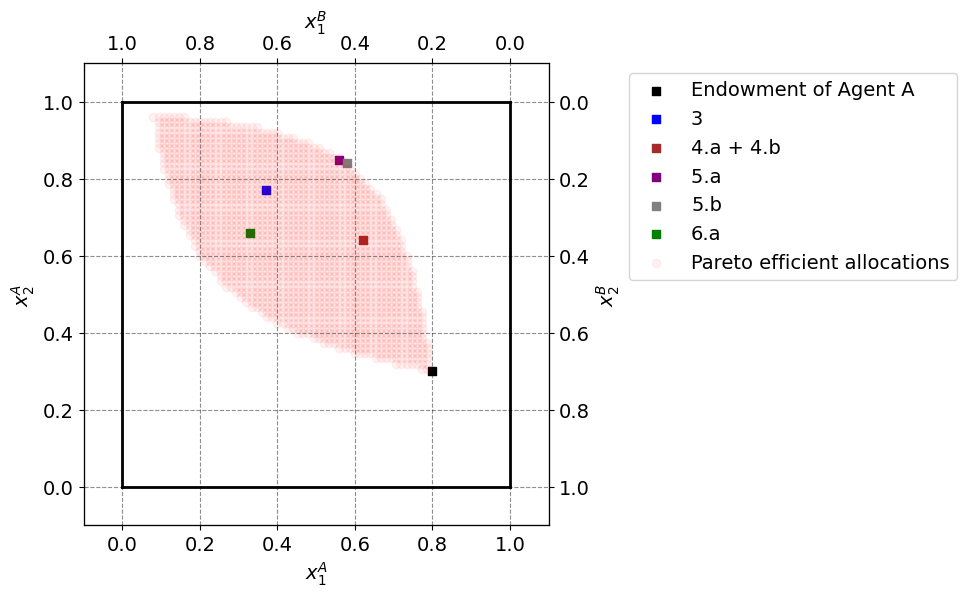

In [67]:
# To help illustrate the results, we have used CHATGPT to help make a graph:
# Defining the parameters
par = model.par
w1bar = 1.0
w2bar = 1.0

# Plotting
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Setting labels
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot endowment of agent A
ax_A.scatter(par.w1A, par.w2A, marker='s', alpha=1, color='black', label='Endowment of Agent A')
ax_A.scatter(0.37, 0.77, marker='s', alpha=1, color='blue', label='3')
ax_A.scatter(0.62, 0.64, marker='s', alpha=1, color='brown', label='4.a + 4.b')
ax_A.scatter(0.56, 0.85, marker='s', alpha=1, color='purple', label='5.a ')
ax_A.scatter(0.58, 0.84, marker='s', alpha=1, color='grey', label='5.b')
ax_A.scatter(0.33, 0.66, marker='s', alpha=1, color='green', label='6.a')

# Ploting Pareto efficient allocations
pareto_x1A = [allocation[0] for allocation in pareto_efficient_allocations]
pareto_x2A = [allocation[1] for allocation in pareto_efficient_allocations]
ax_A.scatter(pareto_x1A, pareto_x2A, marker='o', alpha=0.05, color='red', label='Pareto efficient allocations')

# Ploting limits of the Edgeworth box
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Setting limits
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.9, 1.0))

plt.show()


Question 7

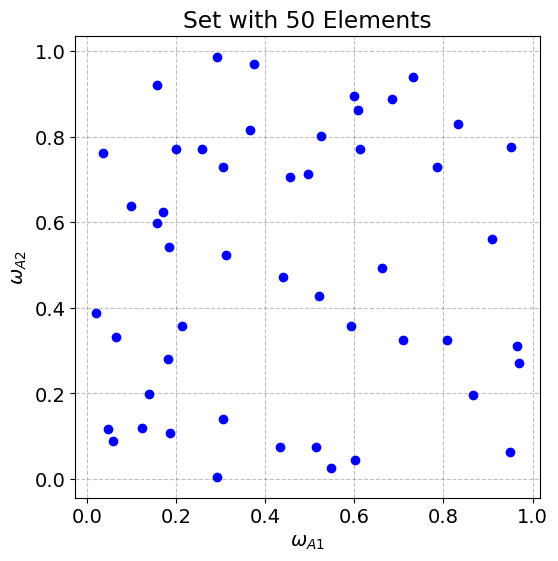

In [68]:
# Setting a random seed
np.random.seed(42)

# Number of elements in sample
num_elements = 50

# Generate random samples for w1A and w2A with a uniform distribution 
w1A = np.random.uniform(0, 1, num_elements)
w2A = np.random.uniform(0, 1, num_elements)

# Plotting w1A and w2A (with help from CHATGPT)
plt.figure(figsize=(6, 6))
plt.scatter(w1A, w2A, color='blue', marker='o')
plt.xlabel('$\omega_{A1}$')
plt.ylabel('$\omega_{A2}$')
plt.title('Set with 50 Elements')
plt.grid(True)
plt.show()

We use seed 42 to generate 50 random draws which is illustrated in the graph above.

Question 8

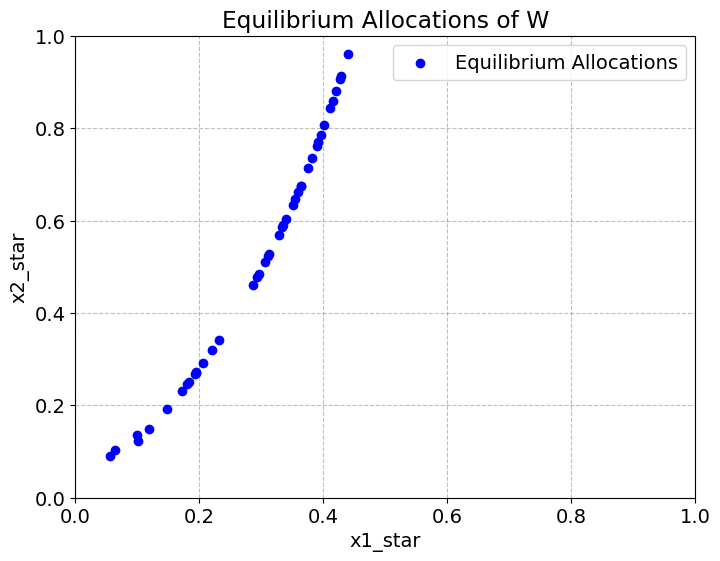

In [69]:
# We group w1A and w2A in pairs.
W = list(zip(w1A,w2A))

# Now we find the equilibrium allocations by using the demand and the market clearing price
x1_star = []
x2_star = []

P1_guess = 1

for par.w1A,par.w2A in W:
    x1_star.append(model.demand_A(model.new_market_clearing_price(P1_guess))[0])
    x2_star.append(model.demand_A(model.new_market_clearing_price(P1_guess))[1])

# After finding the equilibrium allocations, we reset the values of w1A and w2A to the original values
model.par.w1A = 0.8
model.par.w2A = 0.3

# We have the total endowment
w1bar = 1.0
w2bar = 1.0

# Plotting the equilibrium allocations with the help of CHATGPT:
plt.figure(figsize=(8, 6))
plt.scatter(x1_star, x2_star, color='blue', label='Equilibrium Allocations')
plt.title('Equilibrium Allocations of W')
plt.xlabel('x1_star')
plt.ylabel('x2_star')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(True)
plt.legend()
plt.show()